The data used in this workflow is comes from: Study: COVID-19 lung autopsy samples <br> Found at https://singlecell.broadinstitute.org/single_cell/study/SCP1052/covid-19-lung-autopsy-samples?scpbr=immune-cell-atlas#study-download <br>
The dataset that was used was lung.h5ad.gz which is h5ad of full lung dataset

Here I am following the scanpy tutroail for preprocessing and clustering. Found here: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [2]:
conda install -c bioconda scanpy

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scanpy

  Using cached scanpy-1.8.2-py3-none-any.whl (2.0 MB)
     |████████████████████████████████| 292 kB 2.0 MB/s eta 0:00:01
  Using cached natsort-8.1.0-py3-none-any.whl (37 kB)
  Using cached umap_learn-0.5.2-py3-none-any.whl
     |████████████████████████████████| 5.9 MB 5.3 MB/s eta 0:00:01     |██████████████████████▏         | 4.1 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 3.1 MB/s eta 0:00:01
  Using cached scipy-1.8.0-cp38-cp38-macosx_12_0_universal2.macosx_10_9_x86_64.whl (55.3 MB)
     |████████████████████████████████| 233 kB 2.1 MB/s eta 0:00:01
  Using cached scikit_learn-1.0.2-cp38-cp38-macosx_10_13_x86_64.whl (7.9 MB)
     |████████████████████████████████| 76 kB 1.7 MB/s eta 0:00:01
  Using cached anndata-0.8.0-py3-none-any.whl (96 kB)
     |████████████████████████████████| 2.3 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 3.8 MB/s eta 0:00:01
     |███

Failed to build numba
    Running setup.py install for numba ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/danielaquijano/opt/anaconda3/envs/NewPython33122/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/kz/671nytjx6wbb6qvvfpv7jwt00000gn/T/pip-install-zdjyhqrq/numba_f105f788a65940c9b7a7207648255752/setup.py'"'"'; __file__='"'"'/private/var/folders/kz/671nytjx6wbb6qvvfpv7jwt00000gn/T/pip-install-zdjyhqrq/numba_f105f788a65940c9b7a7207648255752/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/kz/671nytjx6wbb6qvvfpv7jwt00000gn/T/pip-record-javqoukz/install-record.txt --single-version-externally-managed --compile --install-headers /Users/danielaqu

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import os

In [1]:
!pip install leidenalg
!pip install louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 KB 618.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 831.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 829.5 kB/s eta 0:00:0000:0100:01


In [28]:
import leidenalg
import louvain

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.19.5 scipy==1.5.4 pandas==1.4.1 scikit-learn==0.23.2 statsmodels==0.12.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.6


In [37]:
!gunzip /Users/danielaquijano/Documents/GitHub/RNA-Seq-Workflows/source_files/lung.h5ad.gz

In [20]:
results_file = '/Users/danielaquijano/Documents/GitHub_Files/source_files/output_files/results_lung.h5ad'  # the file that will store the analysis results

In [3]:
annotation_data = sc.read('/Users/danielaquijano/Documents/GitHub_Files/source_files/lung.h5ad')

In [4]:
annotation_data.var_names_make_unique() 

In [ ]:
annotation_data 

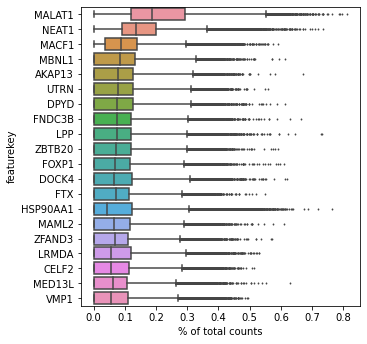

In [5]:
sc.pl.highest_expr_genes(annotation_data , n_top=20, )

In [4]:
sc.pp.filter_cells(annotation_data, min_genes=200)
sc.pp.filter_genes(annotation_data, min_cells=3)

/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(


filtered out 1528 genes that are detected in less than 3 cells


In [5]:
annotation_data.var['mt'] = annotation_data.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(annotation_data, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

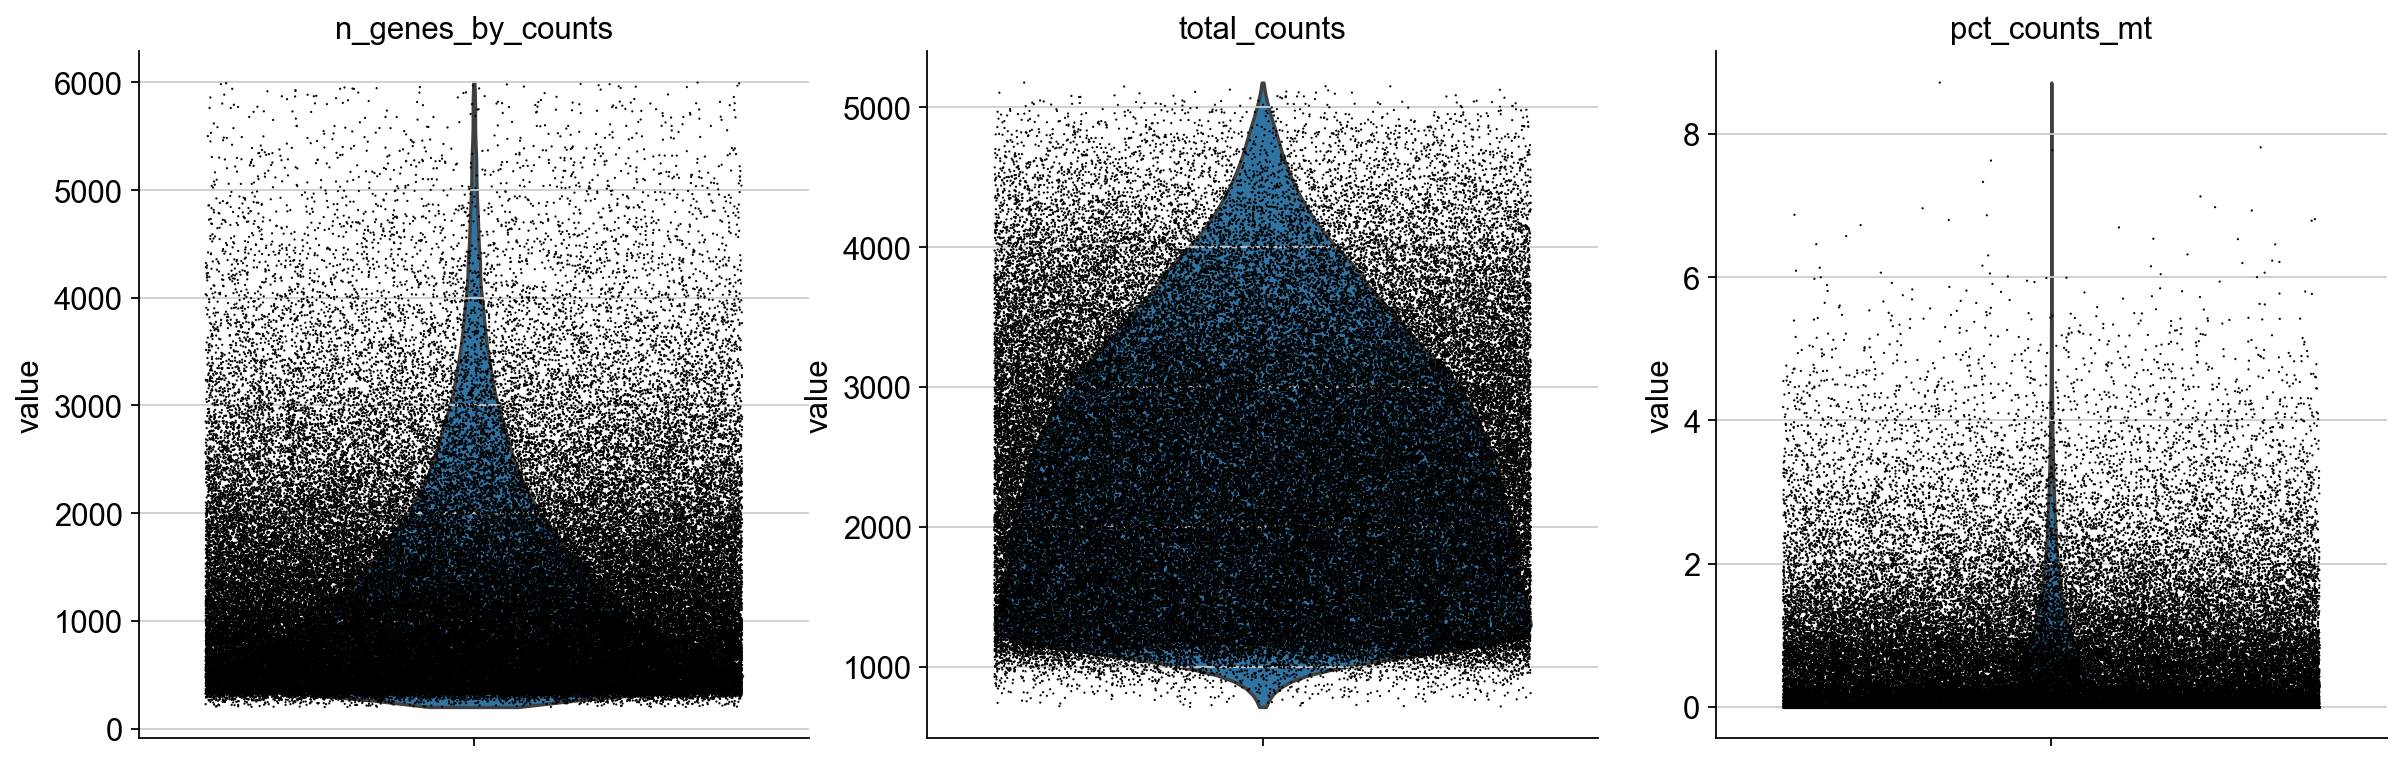

In [6]:
sc.pl.violin(annotation_data, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

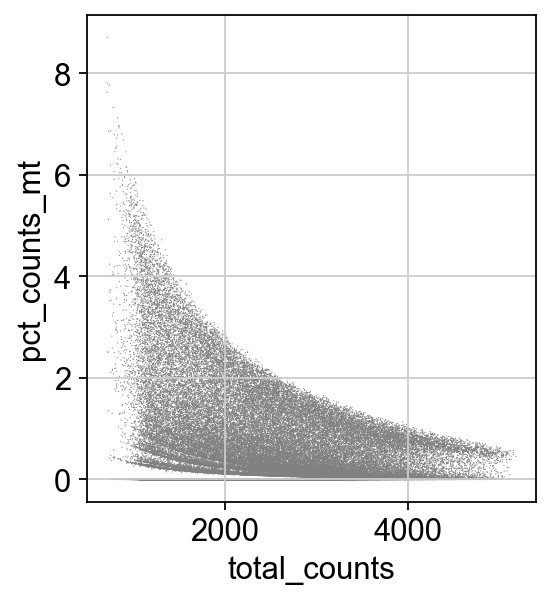

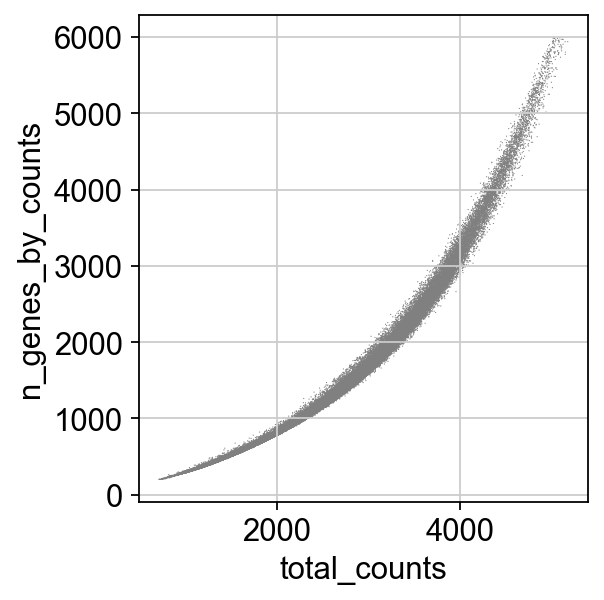

In [7]:
sc.pl.scatter(annotation_data, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(annotation_data, x='total_counts', y='n_genes_by_counts')

In [9]:
annotation_data = annotation_data[annotation_data.obs.n_genes_by_counts < 2500, :]
annotation_data = annotation_data[annotation_data.obs.pct_counts_mt < 5, :]

/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(


In [10]:
sc.pp.normalize_total(annotation_data, target_sum=1e4)

/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:02)


In [11]:
sc.pp.log1p(annotation_data)

In [12]:
sc.pp.highly_variable_genes(annotation_data, min_mean=0.0125, max_mean=3, min_disp=0.5)


extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


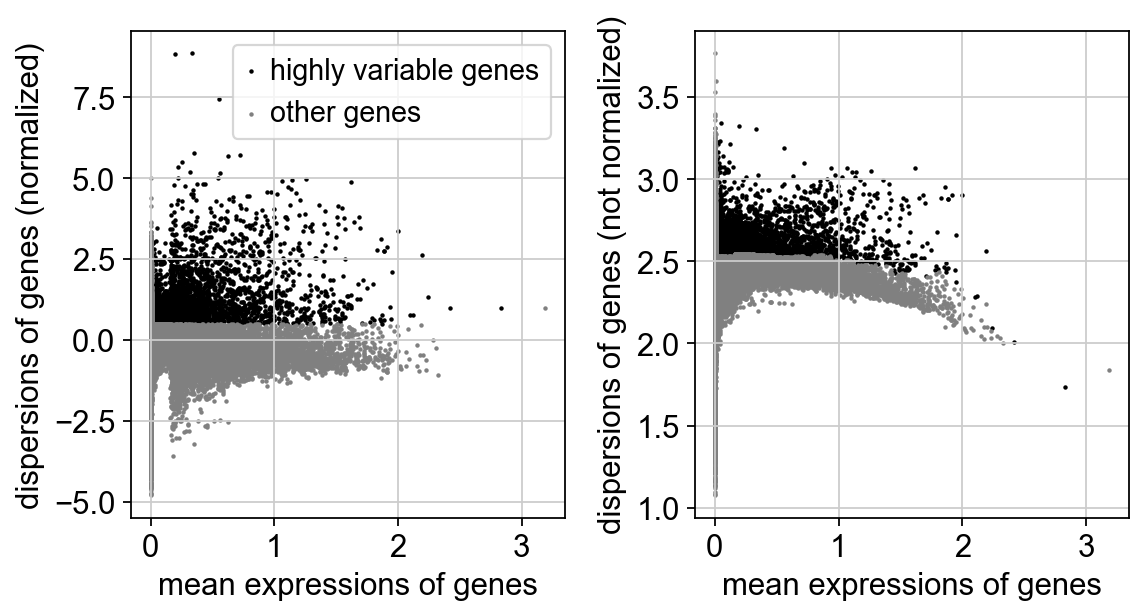

In [13]:
sc.pl.highly_variable_genes(annotation_data)

In [14]:
annotation_data = annotation_data[:, annotation_data.var.highly_variable]

In [15]:
sc.pp.regress_out(annotation_data, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


    finished (0:13:04)


In [16]:
sc.pp.scale(annotation_data, max_value=10)

# Principal component analysis

In [17]:
sc.tl.pca(annotation_data, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:02:18)


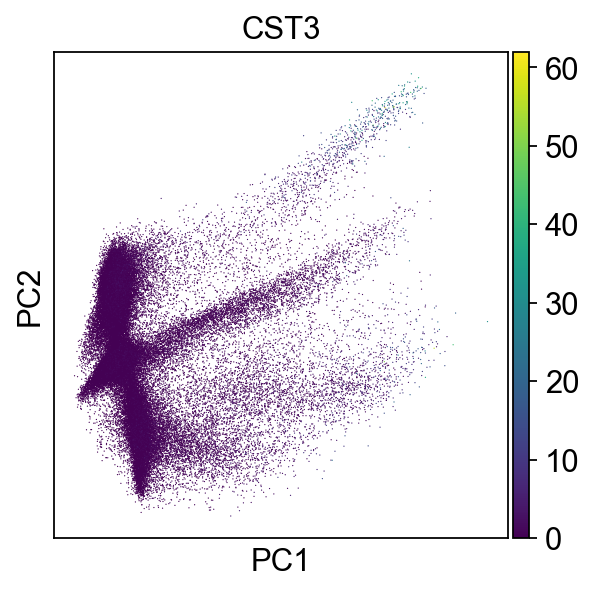

In [18]:
sc.pl.pca(annotation_data, color='CST3')

In [21]:
annotation_data.write(results_file)

In [22]:
annotation_data

AnnData object with n_obs × n_vars = 94780 × 5047
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'featureid', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Nuc-Cell_colors', 'SubCluster_colors', 'W_harmony', 'genome', 'harmony_knn_distances', 'harmony_knn_indices', 'manual_coarse_annotation_colors', 'method_colors', 'modality', 'neighbors', 'pca', 'predictions_colors', 'sample_colors', 'umap', 'log1p', 'hvg'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'sig_background'
    varm: 'PCs', 'de_res'
    layers: 'counts', 'winsorized'

# Neighborhood Graph


In [23]:
sc.pp.neighbors(annotation_data, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:58)


In [32]:
sc.tl.leiden(annotation_data)

running Leiden clustering
    finished: found 38 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:30)


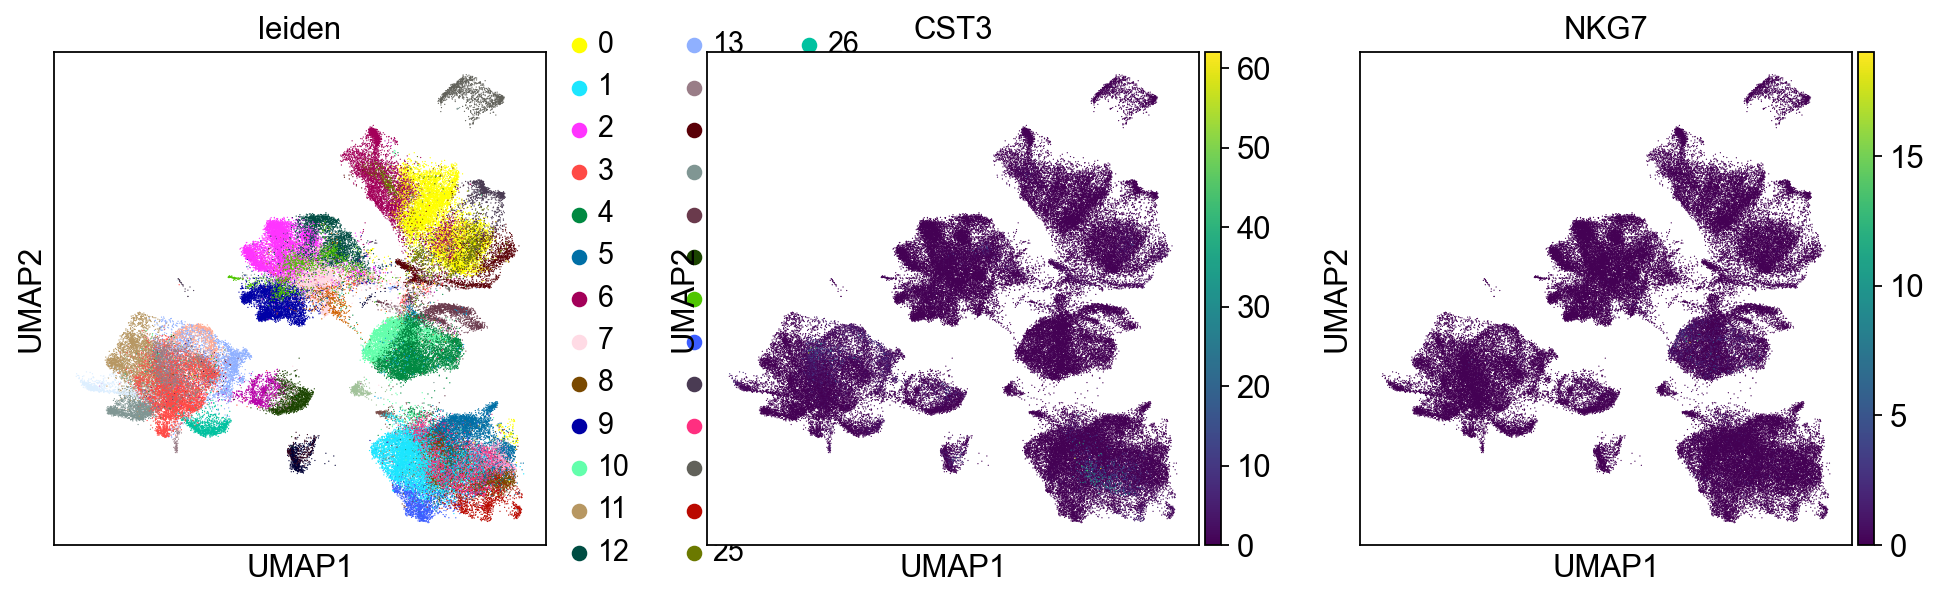

In [33]:
sc.pl.umap(annotation_data, color=['leiden', 'CST3', 'NKG7'])

In [34]:
annotation_data.write(results_file)

# Marker Genes

In [36]:
sc.pp.log1p(annotation_data)

/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


ranking genes


/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perform

/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarni

/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarni

/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarni

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:29)


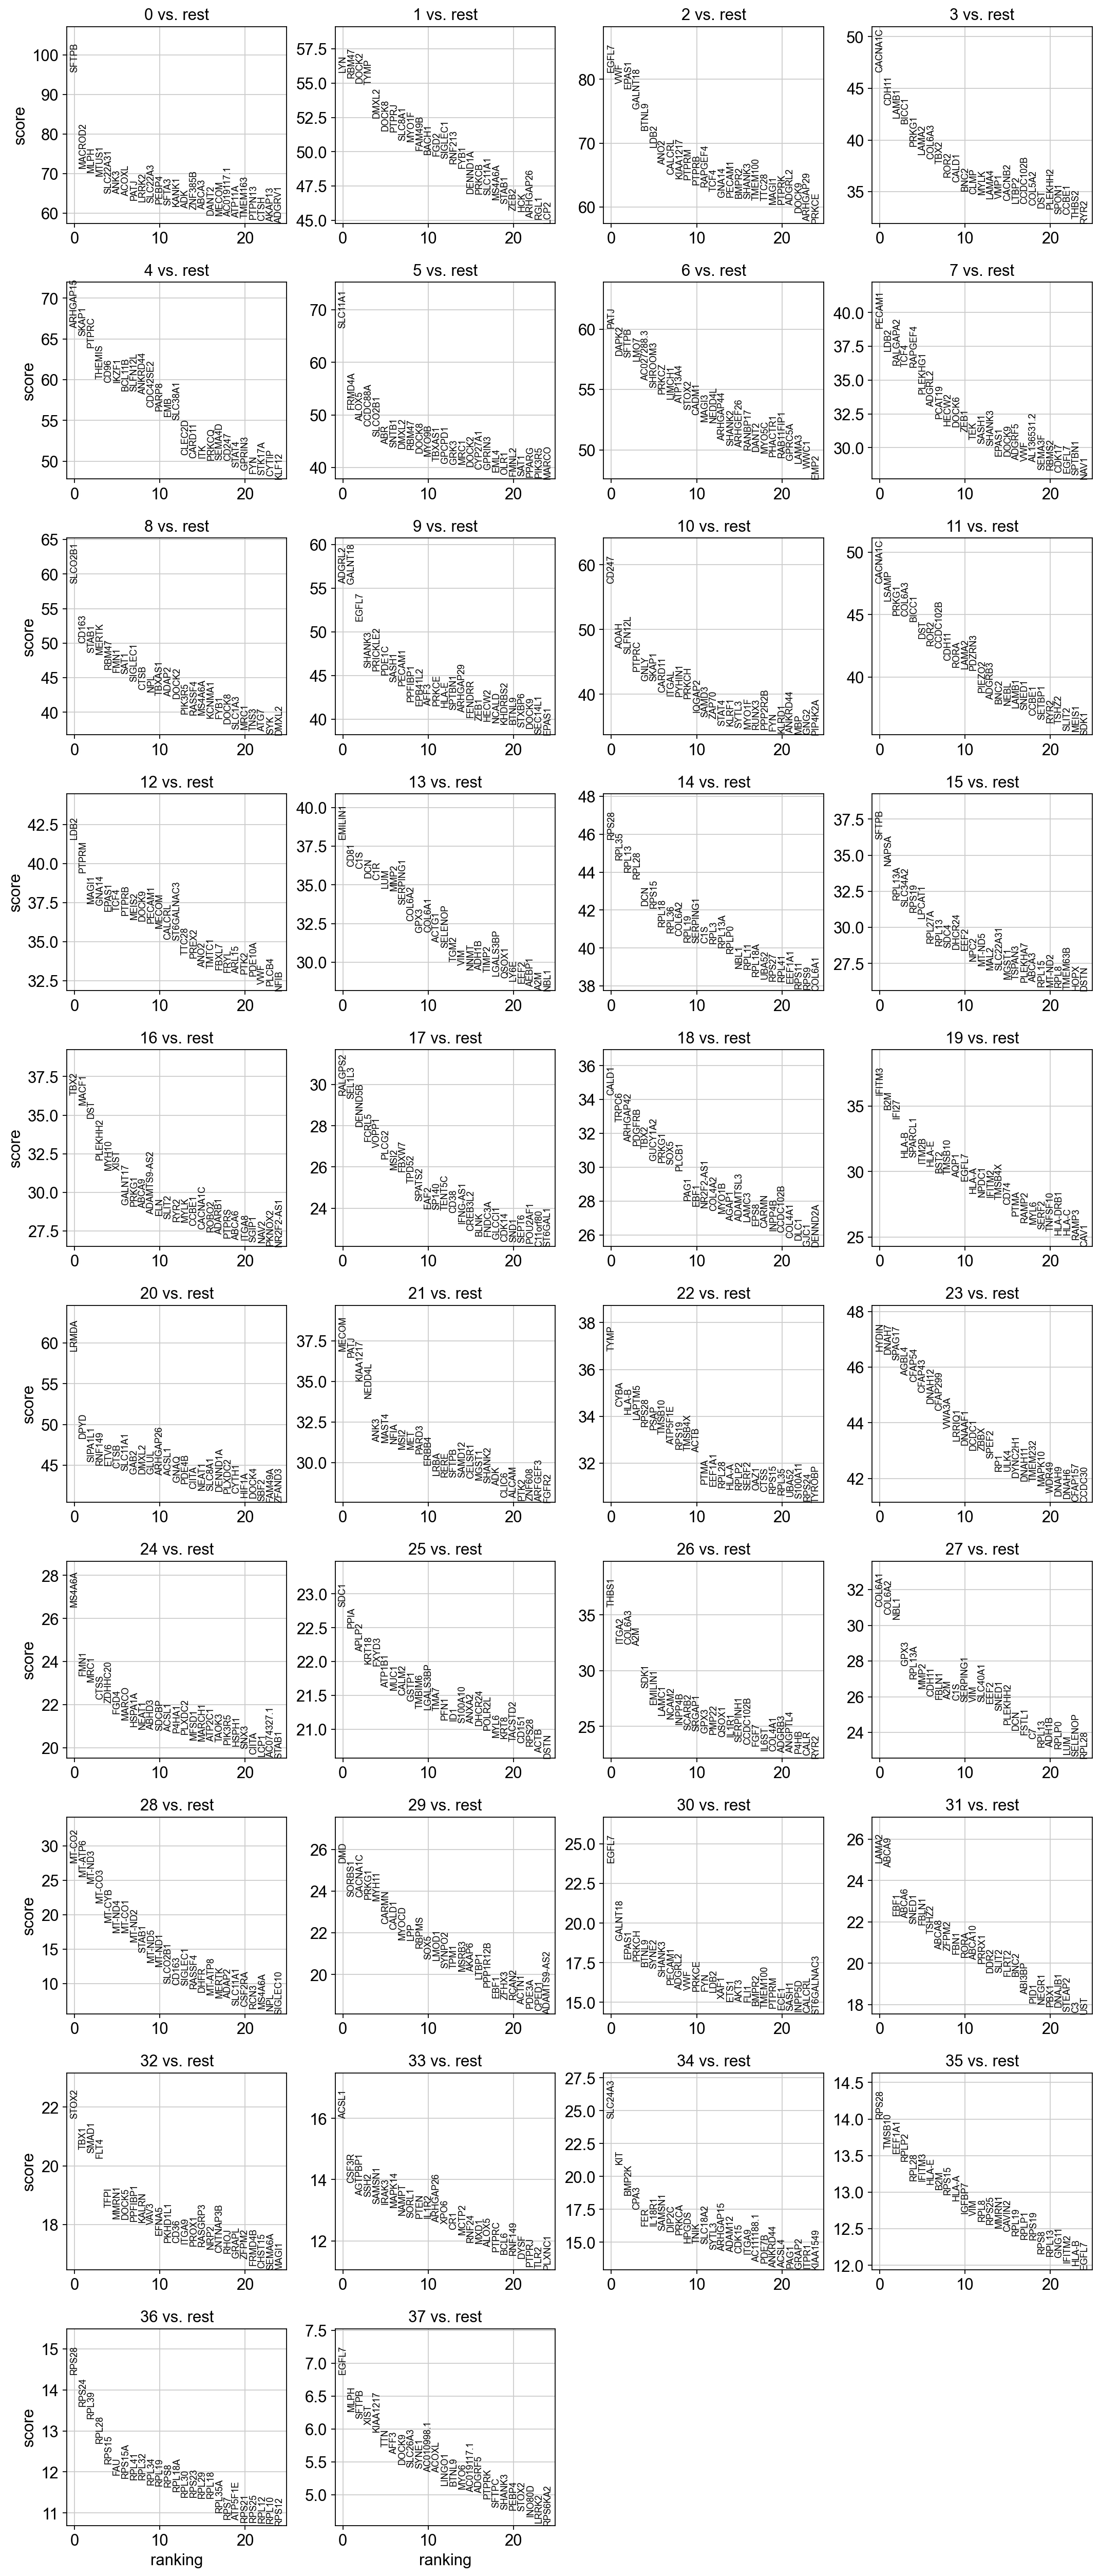

In [35]:
sc.tl.rank_genes_groups(annotation_data, 'leiden', method='t-test')
sc.pl.rank_genes_groups(annotation_data, n_genes=25, sharey=False)

In [1]:
annotation_data = sc.read(results_file)

NameError: name 'sc' is not defined